In [ ]:
import numpy as np
import pandas as pd
from IPython import display
from time import sleep
import math
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CS410/DE and CEM/Plot

/content/drive/MyDrive/CS410/DE and CEM/Plot


In [ ]:
def Sphere(ind):
    sum = 0
    for i in ind:
        sum += i**2
    return sum

In [ ]:
def Zakharov(x):
  d = len(x)
  sum1 = 0.0
  sum2 = 0.0
  for i in range(d):
    sum1 += x[i]**2
    sum2 += 0.5 * (i + 1) * x[i]
  y = sum1 + sum2**2 + sum2**4
  return y

In [ ]:
def Rosenbrock(ind):
    sum = 0
    for i in range(len(ind) - 1):
        sum += 100 * (ind[i + 1] - ind[i]**2)**2 + (ind[i] - 1)**2
    return sum 

In [ ]:
def Michalewicz(x):
  d = len(x)
  sum = 0.0
  for i in range(d):
    sum += np.sin(x[i])*pow((np.sin((i+1)*pow(x[i],2)/np.pi)),20) 
  return sum

In [ ]:
def Ackley(d):
    a = 20
    b = 0.2
    c = 2 * np.pi
    sum1 = 0
    sum2 = 0
    for i in range(len(d)):
        sum1 += d[i] ** 2
        sum2 += np.cos(c * d[i])
    term1 = -a * np.exp(-b * np.sqrt(sum1 / len(d)))
    term2 = -np.exp(sum2 / len(d))

    return term1 + term2 + a + np.exp(1)

In [ ]:
F_scale=0.8 
cross_prob=0.7 

In [ ]:
def DE(test_function, dimension, bounds, F_scale, cross_prob, popsize, max_evals):
    eps = 0.00001

    bound_lower, bound_upper = np.asarray(bounds).T

    diff = np.fabs(bound_lower - bound_upper)

    pop = bound_lower + diff * np.random.rand(popsize, dimension)

    fitness = np.asarray([test_function(ind) for ind in pop])
    num_eval = 1
    
    best_idx = np.argmin(fitness)
    best = pop[best_idx]

    results = []
    all_pops = []
    results.append((np.copy(best), fitness[best_idx], num_eval))
    all_pops.append(np.copy(pop))
    generation_count = 0
    
    while True:
        # max_evals = 10000 if popsize >= 512 else 5000
        if num_eval > max_evals:
            break
        for i in range(popsize):
            # Mutation step
            idxes = [idx for idx in range(popsize) if idx != i]
            a, b, c = pop[np.random.choice(idxes, 3, replace=False)]
            mutant = np.clip(F_scale*(b - c) + a, bound_lower, bound_upper)

            # Create cross point
            cross_points = np.random.rand(dimension) < cross_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimension)] = True
            
            # Offspring
            trial = np.where(cross_points, mutant, pop[i])

            # Evaluate fitness
            f = test_function(trial)
            num_eval += 1

            if f < fitness[i]:
                pop[i] = trial
                fitness[i] = f 
                if f < fitness[best_idx]:
                    best = trial
                    best_idx = i

        results.append((np.copy(best), fitness[best_idx], num_eval))
        all_pops.append(np.copy(pop))

        if test_function(best) < eps:
            num_eval += 1
            break

        generation_count += 1

    return results, all_pops, generation_count

In [ ]:
def CEM(test_function, dimensions, bounds, popsize, num_elite, sigma_init, extra_std, seed_number):
    np.random.seed(seed_number)
    eps = 1e-4
    bound_lower, bound_upper = np.asarray(bounds).T
    sigma = sigma_init * np.eye(dimensions)

    diff = np.fabs(bound_lower - bound_upper)
    n_evals = 0
    num_evals = [0]
    mu = np.random.rand(dimensions) - (bound_upper + 1)
    generation_count = 0
    all_mu = []
    all_sigma = []
    all_offspring = []
    all_elite = []
    all_fitness = []
    while True:
    # for i in range(10000):
        if n_evals > max_evals:
            break
        all_mu.append(mu)
        all_sigma.append(sigma)

        x = np.random.multivariate_normal(mu, sigma, popsize)
        all_offspring.append(x)
        fitness = np.array([test_function(x[i]) for i in range(popsize)])
        n_evals += popsize
        best_fitness = max(fitness) 
        all_fitness.append(best_fitness)
        if best_fitness < eps or np.sum(x) > 1e150 or np.sum(x) < -1e150:
            break

        elite_idx = fitness.argsort()[:num_elite]
        all_elite.append(elite_idx)

        sigma = np.zeros_like(sigma)

        for i in range(num_elite):
            z = x[elite_idx[i]] - mu
            z = z.reshape(-1, 1)
            sigma += tf.matmul(z.T, z)

        sigma += np.eye(dimension)*extra_std
        sigma *= (1/num_elite)
        mu = np.mean(x[elite_idx], axis=0)

        generation_count += 1
        num_evals.append(n_evals)

    all_mu.append(mu)
    best_results = mu.copy()
    best_fitness = test_function(mu)
    return all_mu, all_fitness, num_evals, generation_count

##Sphere

###d=2

In [68]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Sphere 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [69]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Sphere 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [70]:
dimension = 2 
max_evals = 1e5 
test_function = Sphere 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [71]:
dimension = 2 
max_evals = 1e5 
test_function = Sphere 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

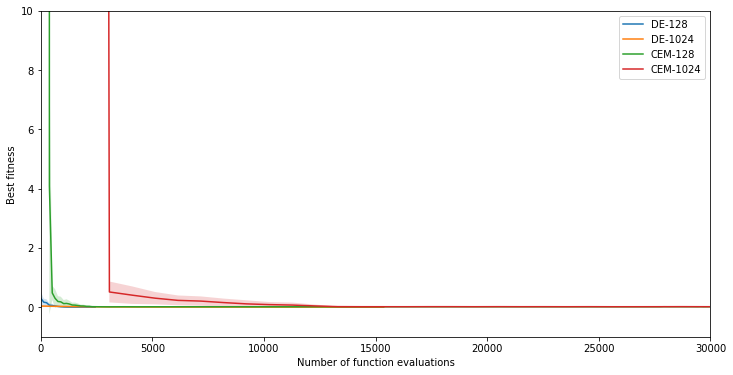

In [72]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=30000)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-2d.png')
plt.show()

###d=10

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Sphere 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Sphere 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Sphere 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Sphere 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

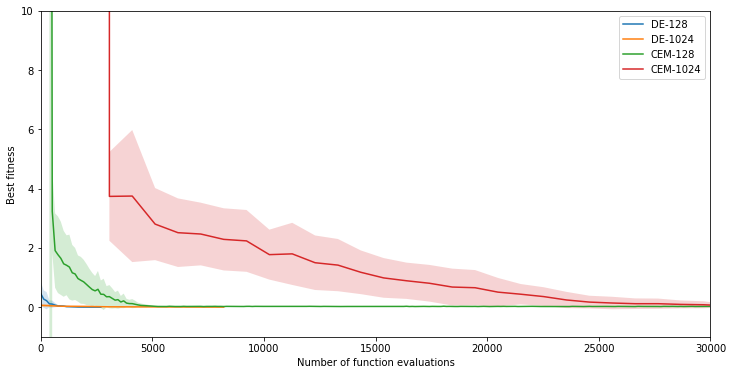

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=30000)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Sphere-10d.png')
plt.show()

##Zakharov

###d=2

In [ ]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Zakharov 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Zakharov 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
dimension = 2 
max_evals = 1e5 
test_function = Zakharov 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [ ]:
dimension = 2 
max_evals = 1e5 
test_function = Zakharov 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

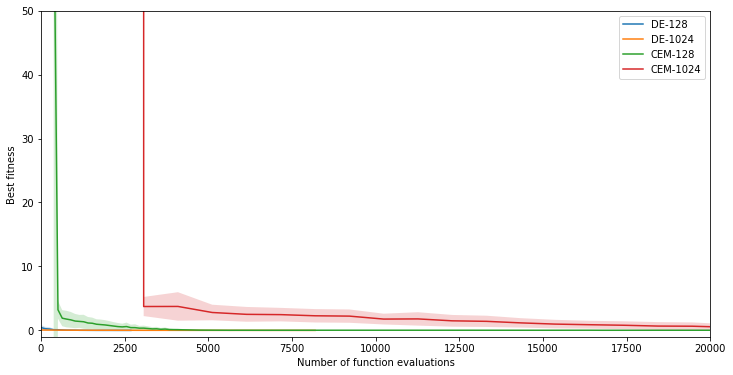

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=20000)
plt.ylim(-1, 50)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Zakharov-2d.png')
plt.show()

###d=10

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Zakharov 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Zakharov 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Zakharov 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Zakharov 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

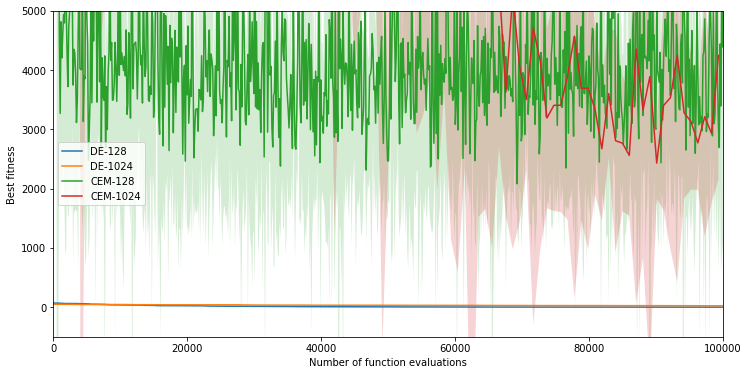

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=100000)
plt.ylim(-500, 5000)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Zakharov-10d.png')
plt.show()

##Rosenbrock

###d=2

In [ ]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Rosenbrock 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Rosenbrock 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
dimension = 2 
max_evals = 1e5 
test_function = Rosenbrock 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [ ]:
dimension = 2 
max_evals = 1e5 
test_function = Rosenbrock 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

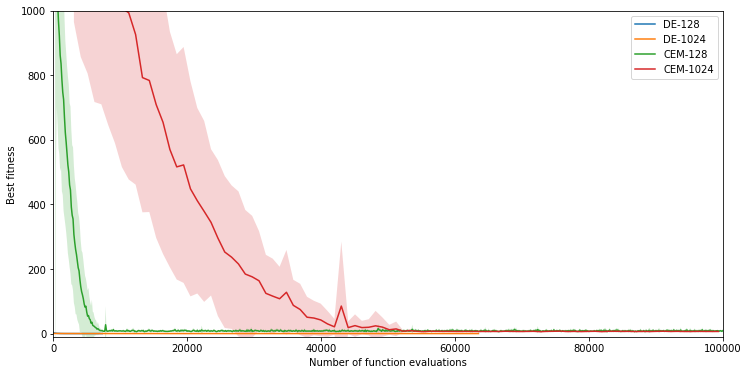

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=100000)
plt.ylim(-10, 1000)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rosenbrock-2d.png')
plt.show()

###d=10

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Rosenbrock 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Rosenbrock 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Rosenbrock 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Rosenbrock 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

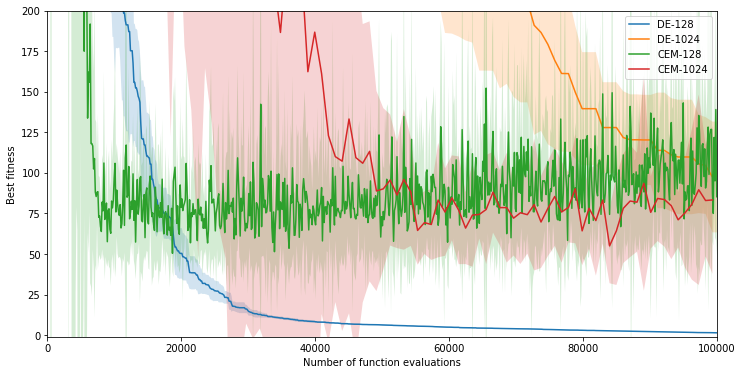

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=100000)
plt.ylim(-1, 200)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Rosenbrock-10d.png')
plt.show()

##Michalewicz

###d=2

In [ ]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Michalewicz 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Michalewicz 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
dimension = 2 
max_evals = 1e5 
test_function = Michalewicz 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [ ]:
dimension = 2 
max_evals = 1e5 
test_function = Michalewicz 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

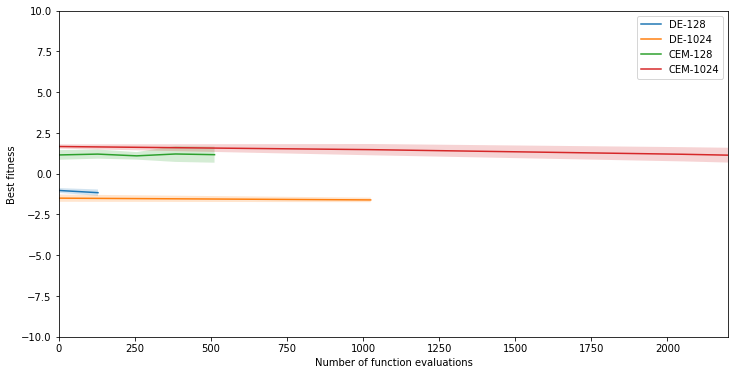

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-10, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Michalewicz-2d.png')
plt.show()

###d=10

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Michalewicz 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Michalewicz 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Michalewicz 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Michalewicz 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

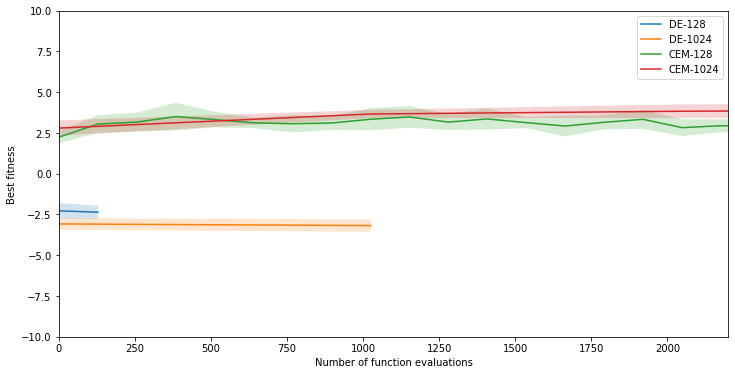

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2200)
plt.ylim(-10, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Michalewicz-10d.png')
plt.show()

##Ackley

###d=2

In [73]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Ackley 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [74]:
all_results = []

dimension = 2 
max_evals = 1e5 
test_function = Ackley 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [75]:
dimension = 2 
max_evals = 1e5 
test_function = Ackley 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [76]:
dimension = 2 
max_evals = 1e5 
test_function = Ackley 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

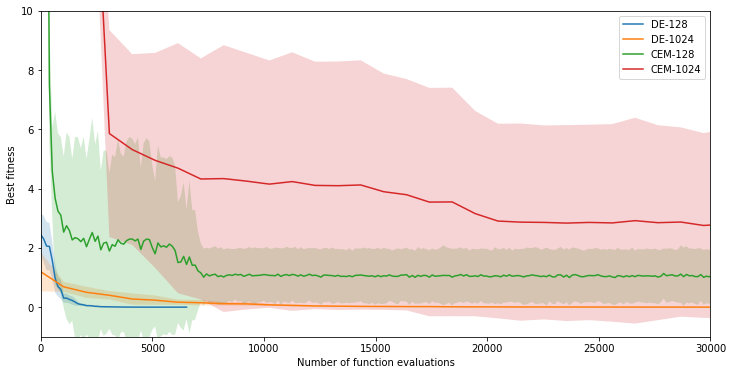

In [77]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=30000)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Ackley-2d.png')
plt.show()

###d=10

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Ackley 
seed_number =  20521394 
popsize = 128 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_128 = []
plt_std_de_128 = []
plt_eval_de_128 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_128.append(np.mean(fitness))
    plt_std_de_128.append(np.std(fitness))
    plt_eval_de_128.append(np.mean(eval))

In [ ]:
all_results = []

dimension = 10 
max_evals = 1e5 
test_function = Ackley 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6
bound_upper = 6

for i in range(10):
    np.random.rand(seed_number)
    results, all_pops, generation_count = DE(test_function, dimension, [(bound_lower, bound_upper)]*dimension, F_scale, cross_prob, popsize, max_evals)
    all_results.append(results)
    seed_number += 1

plt_fitness_de_1024 = []
plt_std_de_1024 = []
plt_eval_de_1024 = []
for i in range(np.min([len(all_results[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_results[j][i][1])
        eval.append(all_results[j][i][2])
    plt_fitness_de_1024.append(np.mean(fitness))
    plt_std_de_1024.append(np.std(fitness))
    plt_eval_de_1024.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Ackley 
seed_number =  20521394 
popsize = 128 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_128 = []
plt_std_CEM_128 = []
plt_eval_CEM_128 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_128.append(np.mean(fitness))
    plt_std_CEM_128.append(np.std(fitness))
    plt_eval_CEM_128.append(np.mean(eval))

In [ ]:
dimension = 10 
max_evals = 1e5 
test_function = Ackley 
seed_number =  20521394 
popsize = 1024 
bound_lower = -6 
bound_upper = 6 
num_elite = 10 
sigma_init = 4 
extra_std = 0.01 

all_results = []
all_fitness = []
num_evals = []

for i in range(10):
    results, fitness, evals, generation_count = CEM(test_function, dimension, [(bound_lower, bound_upper)]*dimension, popsize, num_elite, sigma_init, extra_std, seed_number)
    all_results.append(results)
    all_fitness.append(fitness)
    num_evals.append(evals)
    seed_number += 1

plt_fitness_CEM_1024 = []
plt_std_CEM_1024 = []
plt_eval_CEM_1024 = []
for i in range(np.min([len(all_fitness[t]) for t in range(10)])):
    fitness = []
    eval = []
    for j in range(10):
        fitness.append(all_fitness[j][i])
        eval.append(num_evals[j][i])
    plt_fitness_CEM_1024.append(np.mean(fitness))
    plt_std_CEM_1024.append(np.std(fitness))
    plt_eval_CEM_1024.append(np.mean(eval))

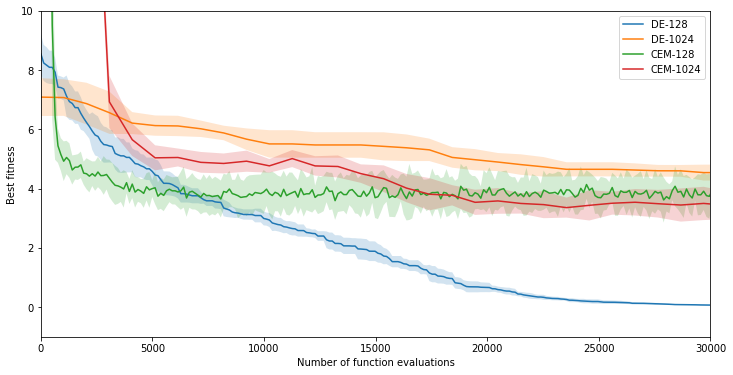

In [ ]:
error1_de_128, error2_de_128 = [], []
for i in range(len(plt_fitness_de_128)):
    error1_de_128.append(plt_fitness_de_128[i] + plt_std_de_128[i])
    error2_de_128.append(plt_fitness_de_128[i] - plt_std_de_128[i])

error1_de_1024, error2_de_1024 = [], []
for i in range(len(plt_fitness_de_1024)):
    error1_de_1024.append(plt_fitness_de_1024[i] + plt_std_de_1024[i])
    error2_de_1024.append(plt_fitness_de_1024[i] - plt_std_de_1024[i])

error1_CEM_128, error2_CEM_128 = [], []
for i in range(len(plt_fitness_CEM_128)):
    error1_CEM_128.append(plt_fitness_CEM_128[i] + plt_std_CEM_128[i])
    error2_CEM_128.append(plt_fitness_CEM_128[i] - plt_std_CEM_128[i])

error1_CEM_1024, error2_CEM_1024 = [], []
for i in range(len(plt_fitness_CEM_1024)):
    error1_CEM_1024.append(plt_fitness_CEM_1024[i] + plt_std_CEM_1024[i])
    error2_CEM_1024.append(plt_fitness_CEM_1024[i] - plt_std_CEM_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=30000)
plt.ylim(-1, 10)

# DE 128
plt.plot(plt_eval_de_128, plt_fitness_de_128, label='DE-128')
plt.fill_between(plt_eval_de_128, error1_de_128, error2_de_128, alpha=0.2)

# DE 1024
plt.plot(plt_eval_de_1024, plt_fitness_de_1024, label='DE-1024')
plt.fill_between(plt_eval_de_1024, error1_de_1024, error2_de_1024, alpha=0.2)

# CEM 128
plt.plot(plt_eval_CEM_128, plt_fitness_CEM_128,label='CEM-128')
plt.fill_between(plt_eval_CEM_128, error1_CEM_128, error2_CEM_128, alpha=0.2)

# CEM 1024
plt.plot(plt_eval_CEM_1024, plt_fitness_CEM_1024, label='CEM-1024')
plt.fill_between(plt_eval_CEM_1024, error1_CEM_1024, error2_CEM_1024, alpha=0.2)

plt.xlabel('Number of function evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('Ackley-10SSd.png')
plt.show()